# Imports and Setup

In [1]:
#! Some things aren't showed here as they are in other files for the development process
import os

os.chdir(
    r"/home/yousinator/personal/ChurnSage"
)  #! Change It to to the path on your device or cloud

import pandas as pd
from prisma_ml import DataSetInformation, MachineLearning, Plotting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif



In [2]:
df = pd.read_csv(
    r"data/processed_data.csv"
)
metadata = {
    "POS_MSISDN": "Point of Sale ID, where the contract was sold/initiated.",
    "Distributer": "Entity/shop responsible for service distribution or activation.",
    "Plan Name": "Name of the plan subscribed to.",
    "Customer Tenure": "Duration between activation and deactivation/current date.",
    "Tenure Category": "Categorization of tenure into segments (short-term, medium-term, and long-term).",
    "Status": "Current status of the line (Active, Suspended, etc.).",
    "Status Reason": "Reason behind the current status.",
    "Segment1": "Customer segmentation category.",
    "Segment2": "Customer segmentation category.",
    "Churn Flag": "Indicator of whether a customer has discontinued the service.",
    "Customer Interaction Score": "Frequency/quality of interactions with customer service.",
    "Loyalty Points": "Points assigned based on tenure, status, and segment.",
    "Data Usage Tier": "Classification based on presumed data usage (3:High, 2:Medium, 1:Low).",
    "Customer Segment Change Flag": "Indicates if a customer changed segments.",
}
info = DataSetInformation(df)

In [3]:
df

,POS_MSISDN,Distributer,Plan Name,Customer Tenure,Tenure Category,Status,Status Reason,Segment1,Segment2,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag,Churn Flag
0,0.548387,0.099291,0.000000,0.575163,0.5,0.000000,1.000000,0.0,0.0,0.222222,0.4750,0.0,1.0,1
1,0.309677,0.234043,0.151515,0.620915,0.5,1.000000,0.333333,1.0,1.0,0.666667,0.6875,1.0,1.0,1
2,0.264516,0.716312,0.090909,0.679739,0.5,1.000000,0.333333,0.0,1.0,0.555556,0.6875,0.5,1.0,1
3,0.632258,0.269504,0.636364,0.254902,0.0,0.666667,0.777778,1.0,0.5,0.888889,0.7875,0.5,1.0,1
4,0.632258,0.269504,0.545455,0.117647,0.0,0.666667,0.444444,1.0,0.5,0.444444,0.0000,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26800,0.264516,0.716312,0.090909,0.026144,0.0,0.666667,0.444444,0.0,1.0,0.444444,0.1250,0.5,1.0,1
26801,0.767742,0.141844,0.787879,0.960784,1.0,0.333333,0.833333,0.0,0.0,0.666667,0.8125,0.0,1.0,0
26802,0.548387,0.021277,0.878788,0.973856,1.0,0.000000,0.611111,0.0,0.0,0.444444,0.6875,0.0,1.0,0
26803,0.696774,0.021277,0.878788,0.947712,1.0,0.000000,0.388889,0.0,0.0,0.111111,0.6875,0.0,1.0,0


# Vetors, Models, and Parameters

In [4]:
X = df.drop(["Churn Flag"], axis=1)
y = df["Churn Flag"]

In [5]:
#! Model Evaluation
test_size = 0.3
iterations = 30

#! KNN
n_neighbors = 5
knn_train_model = KNeighborsClassifier(n_neighbors=n_neighbors)

#! Random Forest
n_estimators = 100  # You can adjust this number as needed
rf_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! SVM
svm_kernel = "rbf"  # You can choose 'linear', 'poly', 'rbf', 'sigmoid', etc.
svm_train_model = SVC(kernel=svm_kernel)

# Select KBest

## K-Nearest Neighbors

### Selecting the features

In [6]:
knn_kbest = MachineLearning()
knn_selector = lambda k: SelectKBest(f_classif, k=k)


knn_kbest_feature_num, knn_selector_results, knn_kbest_feature_names, knn_kbest_selector = knn_kbest.select_best_features(
    X, y, knn_train_model, knn_selector
)

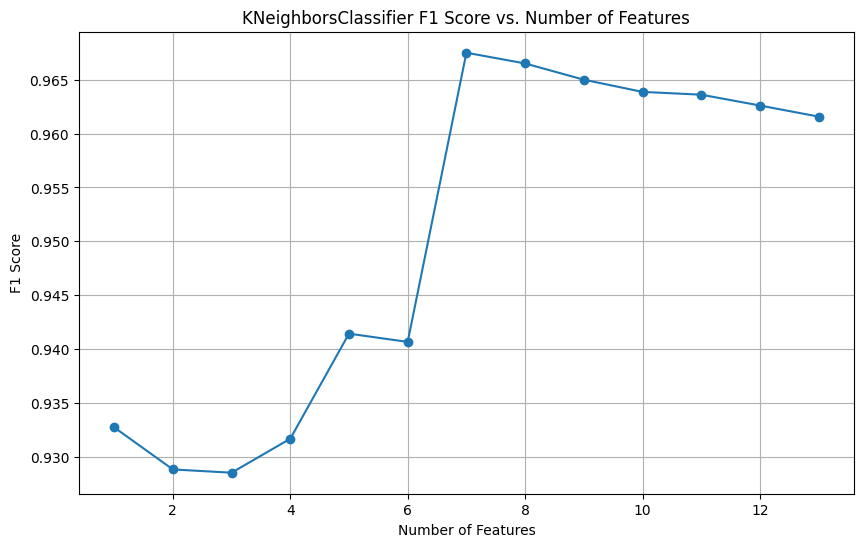

In [7]:
knn_kbest.plot_accuracy_vs_features()

In [8]:
acc = knn_selector_results.iloc[knn_kbest_feature_num -1]["F1 Score"]
print(f"The following {knn_kbest_feature_num} features provided the best accuracy of {acc}:\n {list(knn_kbest_feature_names)}")

The following 7 features provided the best accuracy of 0.9675075676656139:
 ['Customer Tenure', 'Tenure Category', 'Status', 'Segment1', 'Segment2', 'Loyalty Points', 'Data Usage Tier']


### Building the model

In [9]:
X_knn_selected = X[X.columns[knn_kbest_selector.get_support()]]

knn_kbest_metrics, avg_knn_kbest_metrics, knn_kbest_model = knn_kbest.evaluate_model(
    X_knn_selected, y, test_size, iterations, knn_train_model
)

#30 Iteration is done


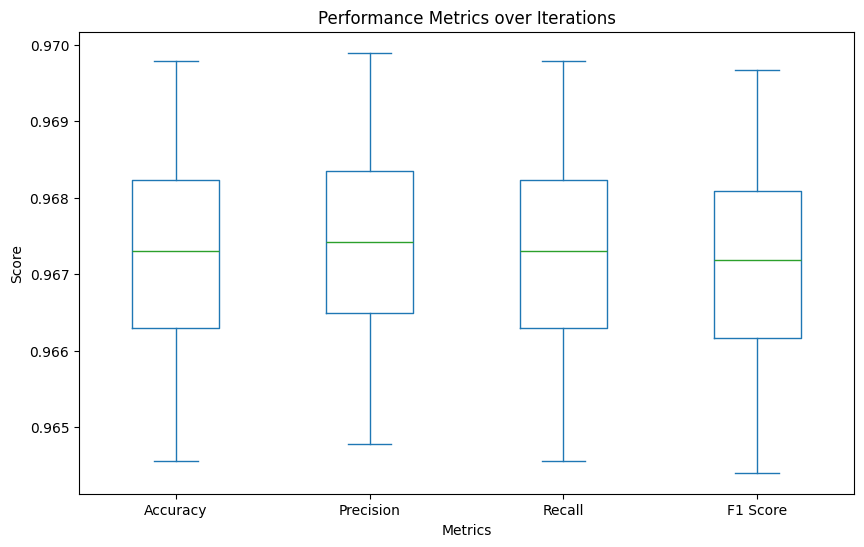

In [10]:
knn_kbest.plot_iteration_metrics()

## Random Forest

### Feature Selection

In [11]:
rf_kbest = MachineLearning()
rf_selector = lambda k: SelectKBest(f_classif, k=k)

(
    rf_kbest_feature_num,
    rf_selector_results,
    rf_kbest_feature_names,
    rf_kbest_selector,
) = rf_kbest.select_best_features(X, y, rf_train_model, rf_selector)

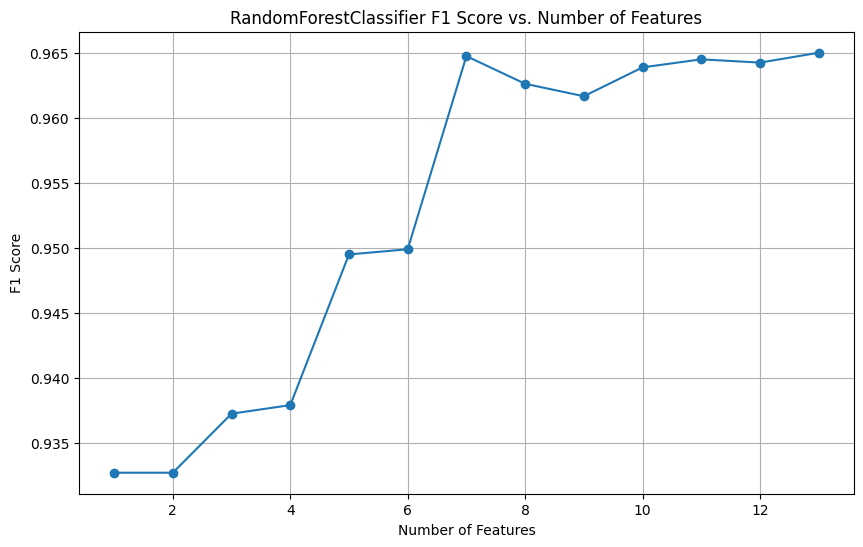

In [12]:
rf_kbest.plot_accuracy_vs_features()

In [13]:
acc = rf_selector_results.iloc[rf_kbest_feature_num - 1]["F1 Score"]
print(
    f"The following {rf_kbest_feature_num} features provided the best accuracy of {acc}:\n {list(rf_kbest_feature_names)}"
)

The following 13 features provided the best accuracy of 0.9650344548428099:
 ['POS_MSISDN', 'Distributer', 'Plan Name', 'Customer Tenure', 'Tenure Category', 'Status', 'Status Reason', 'Segment1', 'Segment2', 'Customer Interaction Score', 'Loyalty Points', 'Data Usage Tier', 'Customer Segment Change Flag']


### Building the Model

In [14]:
X_rf_selected = X[X.columns[rf_kbest_selector.get_support()]]

rf_kbest_metrics, avg_rf_kbest_metrics, rf_kbest_model = rf_kbest.evaluate_model(
    X_rf_selected, y, test_size, iterations, rf_train_model
)

#30 Iteration is done


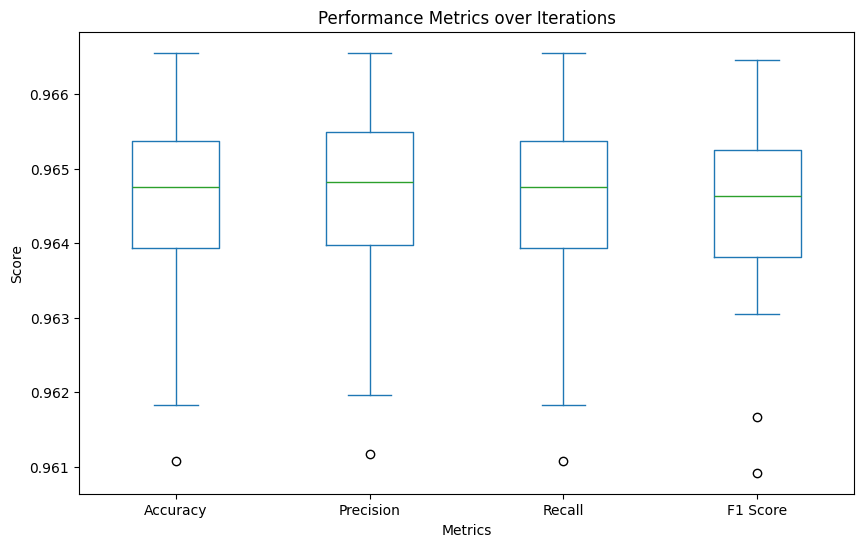

In [15]:
rf_kbest.plot_iteration_metrics()

## SVM

### Feature Selection

In [16]:
svm_kbest = MachineLearning()
svm_selector = lambda k: SelectKBest(f_classif, k=k)

svm_kbest.select_best_features(X, y, svm_train_model, svm_selector)

# Retrieve the results of feature selection
(
    svm_kbest_feature_num,
    svm_selector_results,
    svm_kbest_feature_names,
    svm_kbest_selector,
) = svm_kbest.select_best_features(X, y, svm_train_model, svm_selector)

KeyboardInterrupt: 

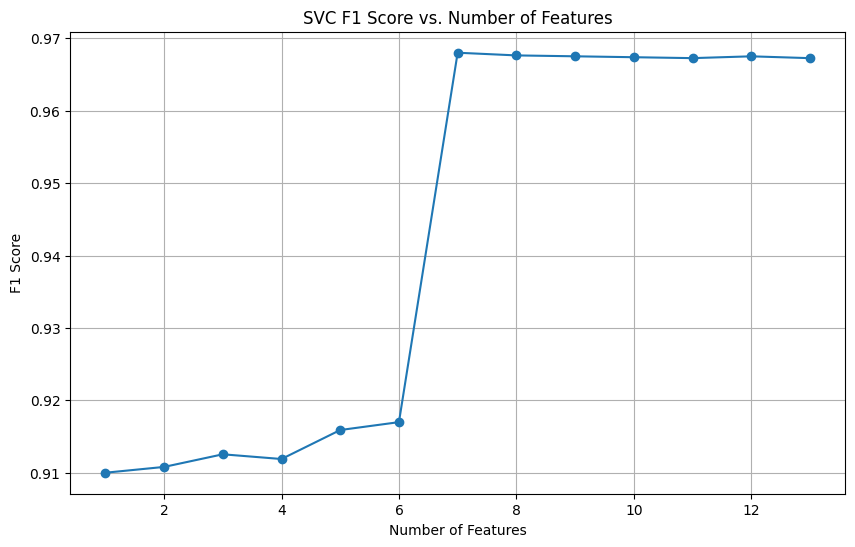

In [ ]:
svm_kbest.plot_accuracy_vs_features()

In [ ]:
acc = svm_selector_results.iloc[svm_kbest_feature_num - 1]["F1 Score"]
print(
    f"The following {svm_kbest_feature_num} features provided the best accuracy of {acc}:\n {list(svm_kbest_feature_names)}"
)

The following 7 features provided the best accuracy of 0.9680074512399889:
 ['Customer Tenure', 'Tenure Category', 'Status', 'Segment1', 'Segment2', 'Loyalty Points', 'Data Usage Tier']


In [ ]:
X_svm_selected = svm_kbest_selector.transform(X)

svm_kbest_metrics, avg_svm_kbest_metrics, model = svm_kbest.evaluate_model(
    X_svm_selected, y, test_size, iterations, svm_train_model
)

#30 Iteration is done


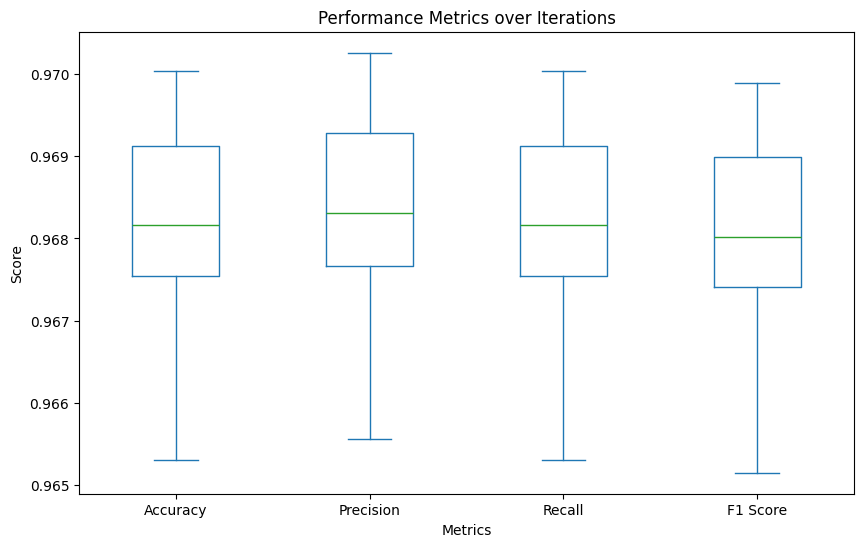

In [ ]:
svm_kbest.plot_iteration_metrics()

# Comparing K-Best Models

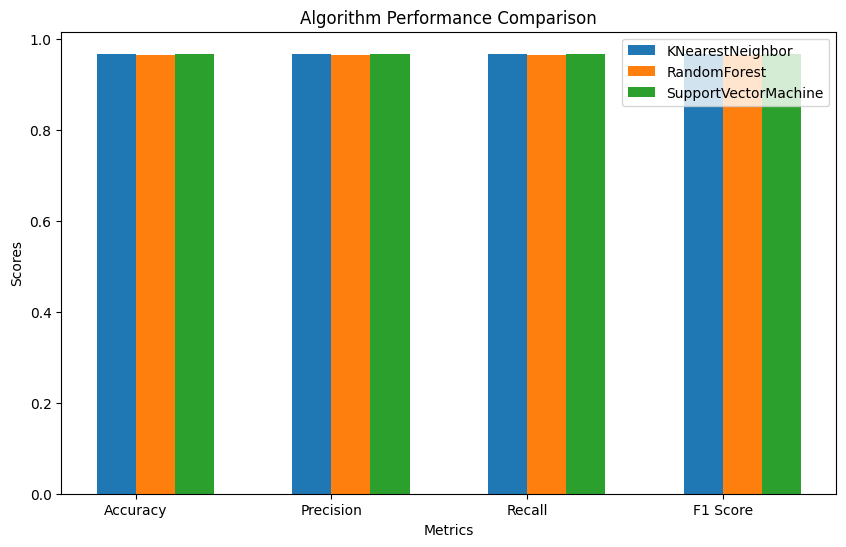

In [ ]:
kbest_metrics = {"KNearestNeighbor":avg_knn_kbest_metrics, "RandomForest":avg_rf_kbest_metrics, "SupportVectorMachine":avg_svm_kbest_metrics}
plot = Plotting(df)

plot.plot_algorithm_comparison(kbest_metrics)

# Model Without Feature selection

## KNN

In [ ]:
knn_normal = MachineLearning()
knn_normal_metrics, avg_knn_normal_metrics, knn_normal_model = knn_normal.evaluate_model(
    X, y, test_size, iterations, knn_train_model
)

#30 Iteration is done


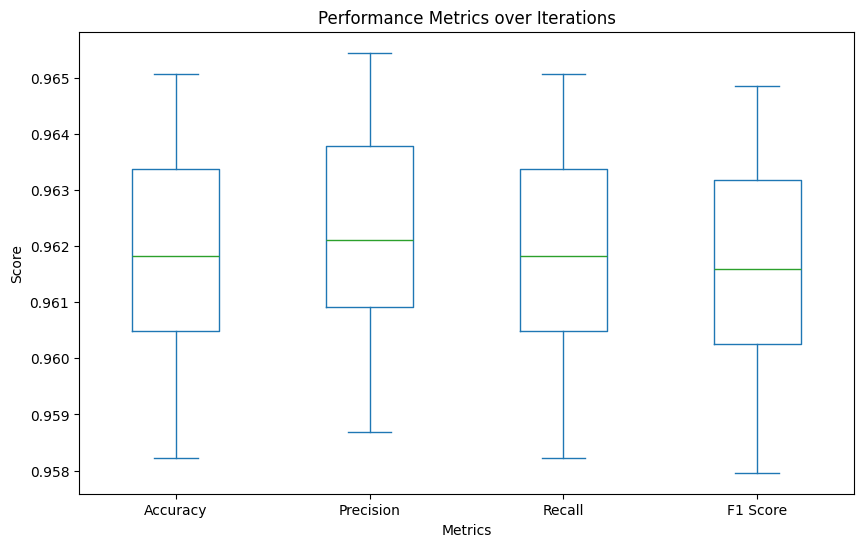

In [ ]:
knn_normal.plot_iteration_metrics()

## Random Forest

In [ ]:
rf_normal = MachineLearning()
(
    rf_normal_metrics,
    avg_rf_normal_metrics,
    rf_normal_model,
) = rf_normal.evaluate_model(X, y, test_size, iterations, rf_train_model)

#30 Iteration is done


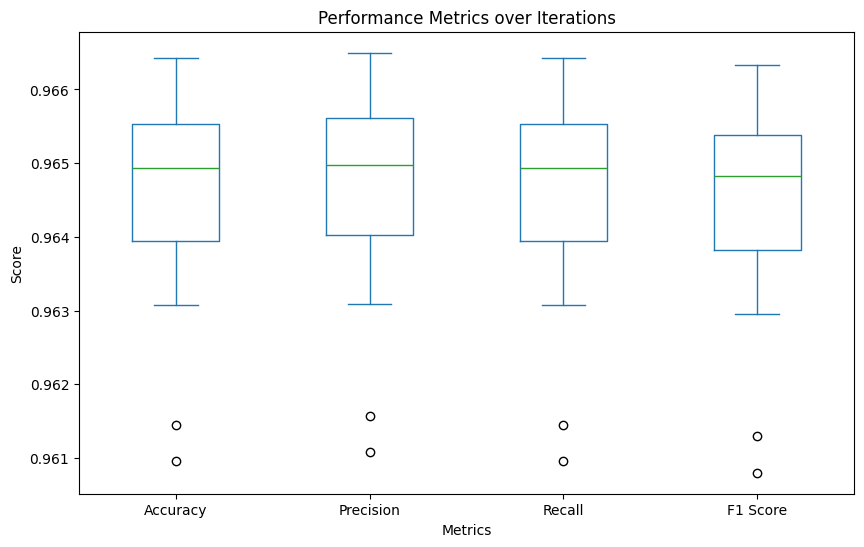

In [ ]:
rf_normal.plot_iteration_metrics()

## SVM

In [ ]:
svm_normal = MachineLearning()
(
    svm_normal_metrics,
    avg_svm_normal_metrics,
    svm_normal_model,
) = svm_normal.evaluate_model(X, y, test_size, iterations, svm_train_model)

#30 Iteration is done


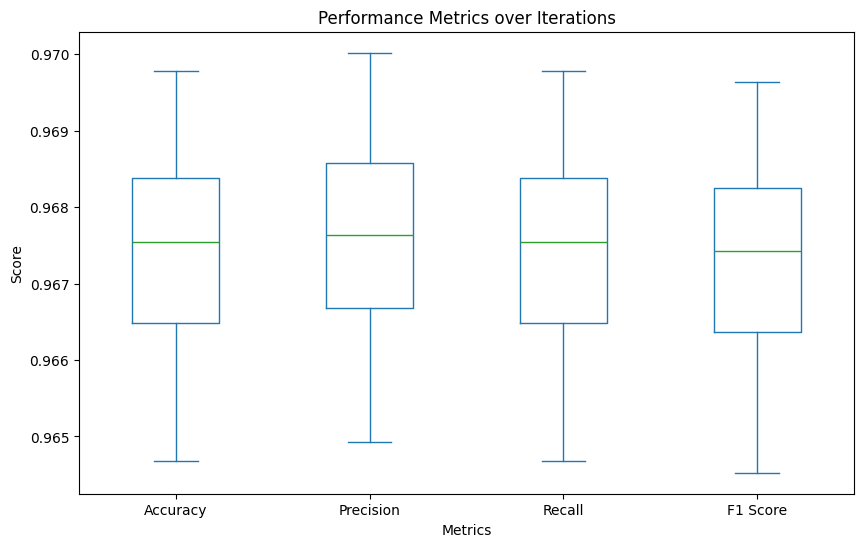

In [ ]:
svm_normal.plot_iteration_metrics()

In [23]:
import pickle

with open("models/knn_model.pkl", "wb") as file:
    pickle.dump(knn_kbest_model, file)

from sklearn.preprocessing import MinMaxScaler

dropped_df = df[
    [
        "Customer Tenure",
        "Tenure Category",
        "Status",
        "Segment1",
        "Segment2",
        "Loyalty Points",
        "Data Usage Tier",
    ]
]

# Initialize and apply MinMaxScaler to the dropped_df
scaler = MinMaxScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())

with open("variables/scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)